In [1]:
%pip install pydicom
%pip install matplotlib
%pip install pandas
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Dataset Description

- Modalities - MR
- Number of Participants - 346
- Number of Studies - 349
- Number of Series - 18,321
- Number of Images - 309,251
- Images Size (GB) - 15.1

Of this, we will only use the t2tsesag MR Images

In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import re
import pydicom
import numpy as np

labels_train = pd.read_csv('./ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')
findings_train = pd.read_csv('./ProstateX-TrainingLesionInformationv2/ProstateX-Findings-Train.csv')

In [3]:
labels_train

,ProxID,Name,fid,pos,WorldMatrix,ijk,TopLevel,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,DCMSerNum
0,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,7
1,ProstateX-0000,ep2d_diff_tra_DYNDIST0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
2,ProstateX-0000,ep2d_diff_tra_DYNDIST1,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
3,ProstateX-0000,ep2d_diff_tra_DYNDIST2,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST,6
4,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,"2,4.0067e-010,0.00377059,-46.6873,-0.000797221...",36 72 9,1.0,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3864,ProstateX-0203,tfl_3d_dynamisch_fast0,2,10.0280456542969 -4.62264251708984 -90.3759994...,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",71 65 5,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d dynamisch fast,18
3865,ProstateX-0203,tfl_3d_dynamisch_fast0,1,-10.02681 -18.5905 -75.1691,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",59 56 7,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d dynamisch fast,19
3866,ProstateX-0203,tfl_3d_dynamisch_fast0,2,10.0280456542969 -4.62264251708984 -90.3759994...,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",71 65 5,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d dynamisch fast,19
3867,ProstateX-0203,tfl_3d_PD_reference0,1,-10.02681 -18.5905 -75.1691,"1.79688,3.68545e-010,-1.13355e-016,-116.895,-3...",59 56 7,NaN,4.5,"1.79688,1.79688,4.5",128x128x12x1,tfl_3d PD reference,10


In [4]:
images_path = Path('../data/PROSTATEx-v1-doiJNLP/PROSTATEx/')

In [5]:
label = labels_train.loc[0]

In [6]:
image_path = next(next((images_path / label['ProxID']).glob('*/')).glob(f'{label['DCMSerNum']}.000000-{label['DCMSerDescr'].replace('_', '')}-*'))
os.listdir(image_path)

['1-07.dcm',
 '1-05.dcm',
 '1-13.dcm',
 '1-03.dcm',
 '1-08.dcm',
 '1-06.dcm',
 '1-11.dcm',
 '1-17.dcm',
 '1-15.dcm',
 '1-18.dcm',
 '1-04.dcm',
 '1-02.dcm',
 '1-10.dcm',
 '1-14.dcm',
 '1-09.dcm',
 '1-19.dcm',
 '1-12.dcm',
 '1-01.dcm',
 '1-16.dcm']

In [7]:
pydicom.dcmread(image_path / '1-01.dcm').pixel_array.shape

(128, 84)

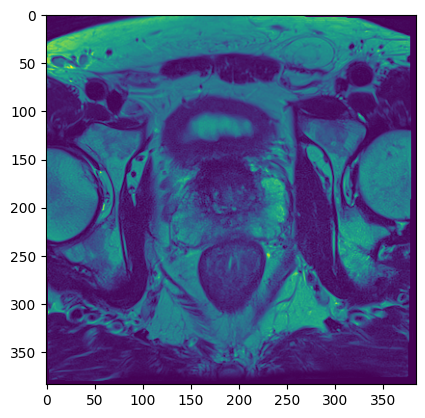

In [8]:
def load_dicom(label):
    image_path = next(next((images_path / label['ProxID']).glob('*/')).glob(f'{label['DCMSerNum']}.000000-{label['DCMSerDescr'].replace('_', '')}-*'))
    
    height, width, num_slices, _ = map(int, label['Dim'].split('x'))

    mri = np.empty((num_slices, width, height), np.uint16)

    for ix, dicom_file in enumerate(sorted(image_path.glob('*.dcm'))):
        ds = pydicom.dcmread(dicom_file).pixel_array
        mri[ix] = ds
    
    return mri


t2tsetra_labels = labels_train[labels_train['DCMSerDescr'] == 't2_tse_tra'].copy()


for ix, row in t2tsetra_labels.iterrows():
    label = row
    
    mri = load_dicom(label)

    plt.imshow(mri[8])

    break


In [9]:
import matplotlib.patches as patches

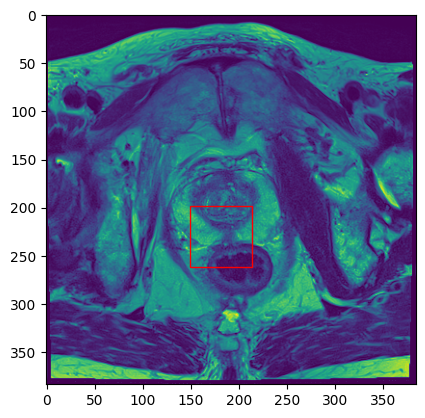

In [62]:
label = t2tsetra_labels.iloc[20]

mri = load_dicom(label)

lesion_col, lesion_row, lesion_slice = map(int, label['ijk'].split())

plt.imshow(mri[lesion_slice])

BOUNDING_BOX_SIZE = 64

lesion_bounding_box = patches.Rectangle((lesion_col - BOUNDING_BOX_SIZE / 2, lesion_row - BOUNDING_BOX_SIZE / 2), BOUNDING_BOX_SIZE, BOUNDING_BOX_SIZE, linewidth=1, edgecolor='r', facecolor='none')

plt.gca().add_patch(lesion_bounding_box)

In [63]:
sorted(t2tsetra_labels['Dim'].unique())

['320x320x19x1',
 '320x320x21x1',
 '320x320x23x1',
 '320x320x27x1',
 '384x384x19x1',
 '384x384x21x1',
 '384x384x23x1',
 '384x384x24x1',
 '384x384x25x1',
 '512x512x21x1',
 '640x640x19x1',
 '640x640x21x1',
 '640x640x25x1',
 '640x640x27x1']

What we should do from here:

1. Resize each image to the smallest image size present in the data (which is 320 x 320)
    - Recalculate lesion coordinate according to resized image
    - Annotate labels with newly calculated lesion coordinate
2. Slice the image to get a 64 x 64 pixel region with 5 slices around the lesion in each image
3. Save these images as pickled files within a directory structure similar to og dataset
    - Save annotated labels

In [64]:
resized_lesion_coordinates = (t2tsetra_labels['ijk'].str.split(expand=True))
resized_lesion_coordinates.columns = ['lesion_col', 'lesion_row', 'lesion_slice']


# resized_lesion_coordinates[['lesion_col', 'lesion_row']] = resized_lesion_coordinates[['lesion_col', 'lesion_row']]
for col in resized_lesion_coordinates.columns:
    resized_lesion_coordinates[col] = pd.to_numeric(resized_lesion_coordinates[col])

image_dims = t2tsetra_labels['Dim'].str.split('x', expand=True).astype(float)
image_dims.columns = ['height', 'width', 'num_slices', 'depth']

for col in image_dims.columns:
    image_dims[col] = pd.to_numeric(image_dims[col])


resized_lesion_coordinates['lesion_col'] *= (320 / image_dims['width'])
resized_lesion_coordinates['lesion_row'] *= (320 / image_dims['height'])


resized_lesion_coordinates

,lesion_col,lesion_row,lesion_slice
7,139.166667,186.666667,9
19,130.833333,155.000000,10
20,130.833333,155.000000,10
40,169.166667,180.000000,10
41,128.333333,180.833333,12
...,...,...,...
3654,191.000000,163.000000,16
3705,145.000000,190.000000,9
3706,167.000000,148.000000,10
3795,144.000000,132.000000,11


In [65]:
resized_lesion_coordinates['lesion_slice'].loc[7]

9

In [66]:
resized_lesion_coordinates.loc[7]

lesion_col      139.166667
lesion_row      186.666667
lesion_slice      9.000000
Name: 7, dtype: float64

In [67]:
import cv2

In [68]:
def load_dicom_slices(label, start_slice, num_slices):
    image_path = next(next((images_path / label['ProxID']).glob('*/')).glob(f'{label['DCMSerNum']}.000000-{label['DCMSerDescr'].replace('_', '')}-*'))
    
    height, width, _, _ = map(int, label['Dim'].split('x'))

    mri = np.empty((num_slices, width, height), np.uint16)

    slice_files = list(sorted(image_path.glob('*.dcm')))

    for ix, dicom_file in enumerate(slice_files[start_slice:start_slice + num_slices]):
        ds = pydicom.dcmread(dicom_file).pixel_array
        mri[ix] = ds
    
    return mri

In [71]:
def draw_bounds(r, c, bounding_box_size, ax=None):
    bounding_box = patches.Rectangle((c - bounding_box_size / 2, r - bounding_box_size / 2), bounding_box_size, bounding_box_size, linewidth=1, edgecolor='r', facecolor='none')
    
    if ax:
        ax.add_patch(bounding_box)
    else:
        plt.gca().add_patch(bounding_box)

In [70]:
t2tsetra_labels['lesion_crop_filename'] = [f'{i}_cropped.npy' for i in t2tsetra_labels.index]

In [89]:
def crop_center(img, r, c, size: int):
    sr = r - size / 2
    er = sr + size
    sc = c - size / 2
    ec = sc + size

    sr, sc, er, ec = map(int, [sr, sc, er, ec])
    
    if min(sr, sc, er, ec) < 0 or max(sr, sc, er, ec) > max(img.shape):
        raise Exception('Lesion crop out of bounds')
    
    return img[:, sr: er, sc: ec]

In [107]:
cropped_lesion_files_path = Path('cropped_lesions/')

for ix, row in t2tsetra_labels.iterrows():
    label = row

    lesion_slice = resized_lesion_coordinates['lesion_slice'].loc[ix]
    lesion_row = resized_lesion_coordinates['lesion_row'].loc[ix]
    lesion_col = resized_lesion_coordinates['lesion_col'].loc[ix]


    resized_mri = np.empty((5, 320, 320))
    
    mri = load_dicom_slices(label, lesion_slice - 2, 5)

    for ix, slice in enumerate(mri):
        resized_mri[ix] = cv2.resize(slice, (320, 320))
        
    # fig, axs = plt.subplots(1, 2)

    # axs[0].imshow(resized_mri[2])

    # draw_bounds(lesion_row, lesion_col, 64, axs[0])

    # cropped_lesion = crop_center(resized_mri, lesion_row, lesion_col, 64)

    # axs[1].imshow(cropped_lesion[2])

    with open(cropped_lesion_files_path / label['lesion_crop_filename'], 'wb+') as f:
        np.save(f, resized_mri)

print('Done')

Done


In [105]:
with open('labeled_cropped_lesions.csv', 'wb+') as f:
    t2tsetra_labels.to_csv(f)